# Домашнее задание №3: Facebook Prophet для прогнозирования временных рядов (базовые 0.8 баллов (максимум 1 балл))

<span style="color: red; font-size: 14pt">Дедлайн: 6 сентября 23:59</span>

_Комментарий_: для удобства оценивания в данном задании разбалловка указано в процентном соотношении относительно 1 балла (т.е. бонусные 0.2 балла это 20% в конце задания).

**Оформление дз**: 

- Task short name: ``HW3 Prophet``.
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_HW#.ipynb``, к примеру -- ``ML2018_ivanov_HW3.ipynb``
- Присылайте выполненное задание на почту <a href="mailto:ml4megafon_2018_08@bigdatateam.org"> ml4megafon_2018_08@bigdatateam.org</a> с темой письма `` HW# Short name. ФИО ``. 

    Например: `` HW3 Prophet. Иванов Иван Иванович. ``

**Вопросы**:
- Свои вопросы присылайте в Telegram.

**Фидбек**:
- Пожалуйста, оставьте свой отзыв после выполнения домашнего задания по сссылке:

   http://bit.ly/ml4megafon_august18_hw3prophet_feedback

In [1]:
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import math
import pandas.tseries.offsets as ofs
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa import stattools

import warnings as w
import plotly.plotly as py

import scipy.stats as scs
import statsmodels.tsa.api as smt

%matplotlib inline

/data/anaconda3/envs/ml/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from fbprophet import Prophet
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

Загрузим данные. Они содержат интервал с пропущенными значениями. Выделим отдельно временной ряд `ts_no_outs` без большого пропуска. По умолчанию будем работать с ним.

In [3]:
ts = pd.read_csv('dataset1_with_outliers_data.csv')
ts.index = pd.to_datetime(ts['ds'])
ts.sort_index(inplace=True)

ts_test = ts[datetime(2015,1,1):]

ts_full = ts[:datetime(2015,1,1)]
ts_no_outs = ts_full[datetime(2012, 1,1):]

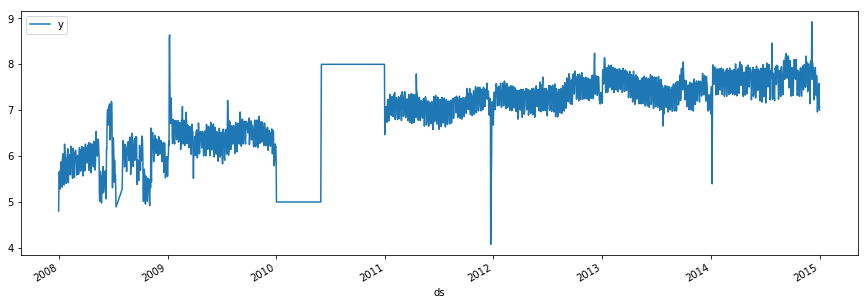

In [4]:
ts_full.plot(figsize=(15,5))

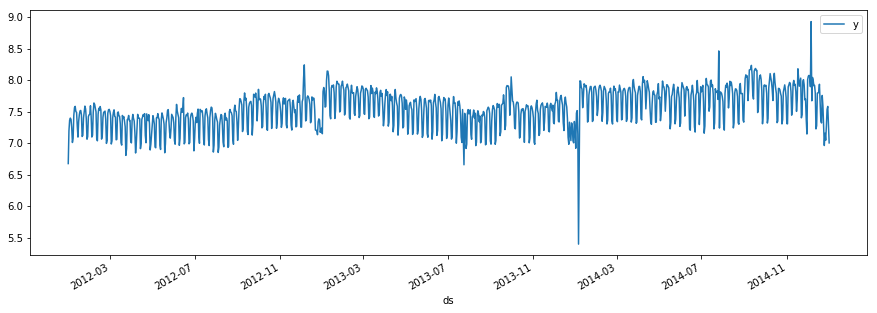

In [5]:
ts_no_outs.plot(figsize=(15,5))

### Часть 0. Разогрев.
Для выполнения этого задания полезно будет просмотреть [вот этот ноутбук](http://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic09_time_series/topic9_part1_time_series_python.ipynb) и обратиться к [официальной документации](https://facebook.github.io/prophet/docs/quick_start.html) Facebook Prophet.


### Часть 1. Проверка ряда на стационарность (20%)

Проверьте ряд на стационарность (например, с помощью критерия [Дики-Фуллера](https://ru.wikipedia.org/wiki/Тест_Дики_—_Фуллера)). Попробуйте привести его к стационарному виду (с помощью преобразования Бокса-Кокса, дифференцирования etc.)

После получения стационарного ряда напишите функцию прямой `transform` и обратной `inv_transform` трансформации временного ряда (т.е. исходный ряд -> стационарный ряд и стационарный ряд -> исходный ряд).

In [6]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])


        plt.tight_layout()
    return         

In [50]:
#

In [7]:
data_fuller = ts_no_outs.copy()

In [8]:
data = ts_no_outs.copy()

In [53]:
#

In [9]:
def fuller(d, n_samples=200, rho=0):
    x = w = d
    for t in range(n_samples):
        x[t] = rho * x[t-1] + w[t]
    
    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Rho {}\n Dickey-Fuller p-value: {}".format(rho, round(sm.tsa.stattools.adfuller(x)[1], 3)))

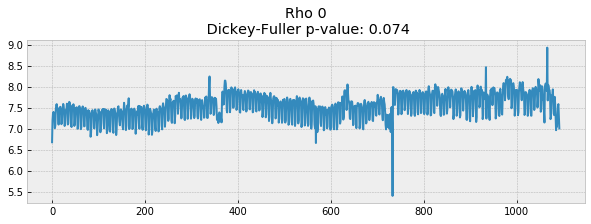

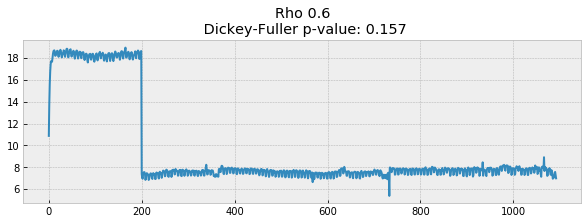

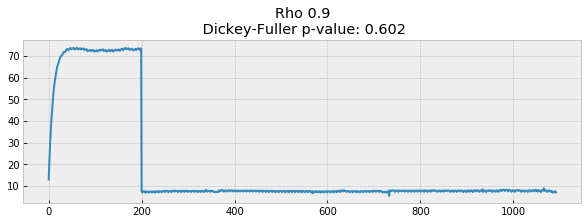

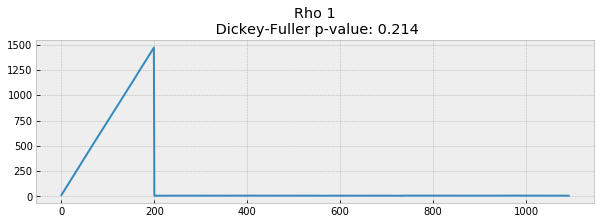

In [10]:
for rho in [0, 0.6, 0.9, 1]:
    fuller(d=data_fuller.copy()['y'].values,rho=rho)

Критерий Дики-Фуллера: p=0.074175


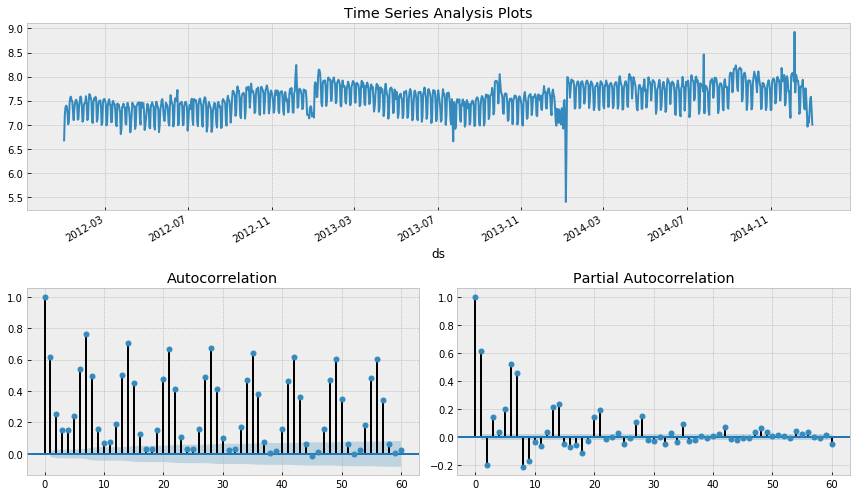

In [11]:
tsplot(data_fuller.y, lags=60)

In [12]:
sm.tsa.stattools.adfuller(data['y'])[1]

0.07417494742311714

In [13]:
sm.tsa.stattools.adfuller(data['y'].diff(1)[1:])[1]

2.854504049051914e-20

In [19]:
data_diff = data['y'].diff(1)

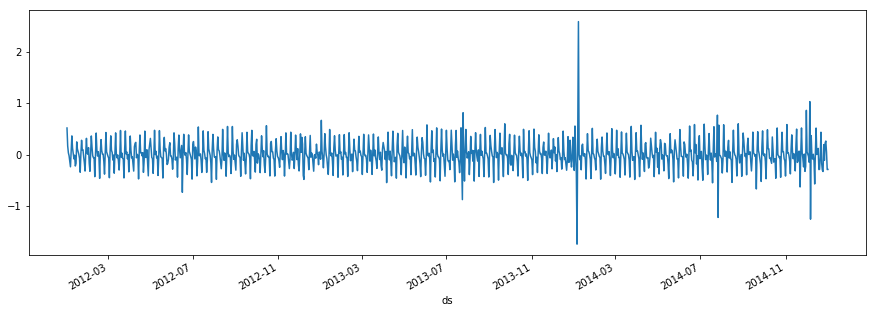

In [20]:
data_diff.plot(figsize=(15,5)) 

In [25]:
data_diff.head

<bound method NDFrame.head of ds
2012-01-01         NaN
2012-01-02    0.518614
2012-01-03    0.168208
2012-01-04    0.034303
2012-01-05   -0.022320
2012-01-06   -0.127548
2012-01-07   -0.236769
2012-01-08    0.062958
2012-01-09    0.364525
2012-01-10    0.125405
2012-01-11    0.019538
2012-01-12   -0.082762
2012-01-13   -0.011124
2012-01-14   -0.221328
2012-01-15   -0.171632
2012-01-16    0.248180
2012-01-17    0.108909
2012-01-18    0.057995
2012-01-19    0.007629
2012-01-20   -0.070856
2012-01-21   -0.342786
2012-01-22    0.017901
2012-01-23    0.279585
2012-01-24    0.089194
2012-01-25    0.095665
2012-01-26   -0.045627
2012-01-27   -0.159559
2012-01-28   -0.319933
2012-01-29    0.041130
2012-01-30    0.317257
                ...   
2014-12-03    0.013162
2014-12-04   -0.031628
2014-12-05   -0.147585
2014-12-06    1.032143
2014-12-07   -1.256219
2014-12-08    0.370052
2014-12-09   -0.046443
2014-12-10   -0.086215
2014-12-11    0.007323
2014-12-12   -0.119609
2014-12-13   -0.570988
2

In [26]:
#

In [27]:
d_bx = scs.boxcox(data.copy().y)

Критерий Дики-Фуллера: p=0.066038


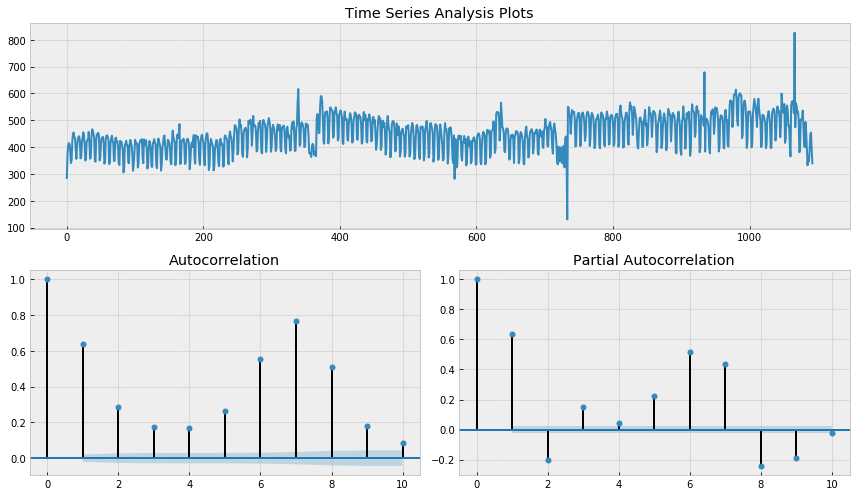

In [28]:
tsplot(d_bx[0], lags=10)

In [66]:
def transform(ts):
    return ts.diff(1)[1:]
    

def inv_transform(ts):
    return ts.cumsum()

In [67]:
transform(data['y'])

ds
2012-01-02    0.518614
2012-01-03    0.168208
2012-01-04    0.034303
2012-01-05   -0.022320
2012-01-06   -0.127548
2012-01-07   -0.236769
2012-01-08    0.062958
2012-01-09    0.364525
2012-01-10    0.125405
2012-01-11    0.019538
2012-01-12   -0.082762
2012-01-13   -0.011124
2012-01-14   -0.221328
2012-01-15   -0.171632
2012-01-16    0.248180
2012-01-17    0.108909
2012-01-18    0.057995
2012-01-19    0.007629
2012-01-20   -0.070856
2012-01-21   -0.342786
2012-01-22    0.017901
2012-01-23    0.279585
2012-01-24    0.089194
2012-01-25    0.095665
2012-01-26   -0.045627
2012-01-27   -0.159559
2012-01-28   -0.319933
2012-01-29    0.041130
2012-01-30    0.317257
2012-01-31    0.028337
                ...   
2014-12-03    0.013162
2014-12-04   -0.031628
2014-12-05   -0.147585
2014-12-06    1.032143
2014-12-07   -1.256219
2014-12-08    0.370052
2014-12-09   -0.046443
2014-12-10   -0.086215
2014-12-11    0.007323
2014-12-12   -0.119609
2014-12-13   -0.570988
2014-12-14    0.050383
2014-12-

In [68]:
inv_transform(transform(data['y']))

ds
2012-01-02    0.518614
2012-01-03    0.686822
2012-01-04    0.721125
2012-01-05    0.698806
2012-01-06    0.571257
2012-01-07    0.334489
2012-01-08    0.397446
2012-01-09    0.761972
2012-01-10    0.887377
2012-01-11    0.906915
2012-01-12    0.824153
2012-01-13    0.813030
2012-01-14    0.591702
2012-01-15    0.420070
2012-01-16    0.668250
2012-01-17    0.777159
2012-01-18    0.835155
2012-01-19    0.842784
2012-01-20    0.771928
2012-01-21    0.429142
2012-01-22    0.447043
2012-01-23    0.726628
2012-01-24    0.815822
2012-01-25    0.911487
2012-01-26    0.865860
2012-01-27    0.706301
2012-01-28    0.386368
2012-01-29    0.427499
2012-01-30    0.744756
2012-01-31    0.773093
                ...   
2014-12-03    1.398826
2014-12-04    1.367198
2014-12-05    1.219613
2014-12-06    2.251756
2014-12-07    0.995538
2014-12-08    1.365590
2014-12-09    1.319146
2014-12-10    1.232932
2014-12-11    1.240255
2014-12-12    1.120646
2014-12-13    0.549658
2014-12-14    0.600041
2014-12-

### Часть 2. Обнаружение выбросов (10%).
С помощью экспоненциального сглаживания найдите выбросы в данных (и попробуйте их сгладить). Для этого подберите оптимальные значения параметров `alpha`, `beta` и `std_window`. Функция для детекции аномалий и сглаживания приведена ниже. Обратите внимание, мы работаем лишь с `ts_train`, тестовый датасет `ts_test` "находится в будущем" и нам недоступен.

In [29]:
def exponential_smoothing_anomaly_filter(series, alpha, beta=2.5, std_window=10):
    """
    Anomaly filter based on simple exponential smoothing.

    Parameters
    ----------
    series : pandas.Series
        Time series to smooth.
    alpha : float in range [0., 1.]
        Smoothing parameter. The smaller is `alpha`, the smoother are result series.
    beta: float
        Multiplier for rolling standard deviation. If the deviation from smoothed time series in some point is bigger
        than `beta`*rolling_std, that point is marked as anomaly.
    std_window : int
        Rolling std window width.

    Returns
    -------
    _ : pandas.Series
        Smoothed time series.
    _ : pandas.Series
        Series containing anomalies (both time and value).
    """


    result = [series[0]] # first value is same as series
    sx = series.rolling(std_window).std()
    anomalies_index = []
    anomalies_values = []
#     print(len(series), len(sx))
    for n in range(1, len(series)):
        if n > std_window:
            if abs(series[n] - result[n-1]) > sx[n]*beta:
                result.append(result[n-1])
                anomalies_index.append(series.index[n])
                anomalies_values.append(series[n])
                continue
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return pd.Series(index=series.index, data=result), pd.Series(index=anomalies_index, data=anomalies_values)

In [32]:
r = exponential_smoothing_anomaly_filter(data.copy()['y'], alpha=1, beta=2.5, std_window=10)

In [35]:
r

(ds
 2012-01-01    6.675823
 2012-01-02    7.194437
 2012-01-03    7.362645
 2012-01-04    7.396949
 2012-01-05    7.374629
 2012-01-06    7.247081
 2012-01-07    7.010312
 2012-01-08    7.073270
 2012-01-09    7.437795
 2012-01-10    7.563201
 2012-01-11    7.582738
 2012-01-12    7.499977
 2012-01-13    7.488853
 2012-01-14    7.267525
 2012-01-15    7.095893
 2012-01-16    7.344073
 2012-01-17    7.452982
 2012-01-18    7.510978
 2012-01-19    7.518607
 2012-01-20    7.447751
 2012-01-21    7.104965
 2012-01-22    7.122867
 2012-01-23    7.402452
 2012-01-24    7.491645
 2012-01-25    7.587311
 2012-01-26    7.541683
 2012-01-27    7.382124
 2012-01-28    7.062192
 2012-01-29    7.103322
 2012-01-30    7.420579
                 ...   
 2014-12-03    7.144407
 2014-12-04    7.144407
 2014-12-05    7.895436
 2014-12-06    8.927580
 2014-12-07    8.927580
 2014-12-08    8.041413
 2014-12-09    7.994970
 2014-12-10    7.908755
 2014-12-11    7.916078
 2014-12-12    7.796469
 2014-12-13 

### Часть 3. Построение прогнозов с помощью библиотеки Facebook Prophet (50%)

#### Построение прогноза (25%)

Сделайте предсказание на год вперед на основании `ts_no_outs` и `ts_full`. Для этого вам пригодится функция `make_future_dataframe()`.

In [47]:
fmodel_ts_no_outs = Prophet()
fmodel_ts_no_outs.fit(ts_no_outs)
future_ts_no_outs = fmodel_ts_no_outs.make_future_dataframe(periods=365)

forecast_ts_no_outs = fmodel_ts_no_outs.predict(future_ts_no_outs)

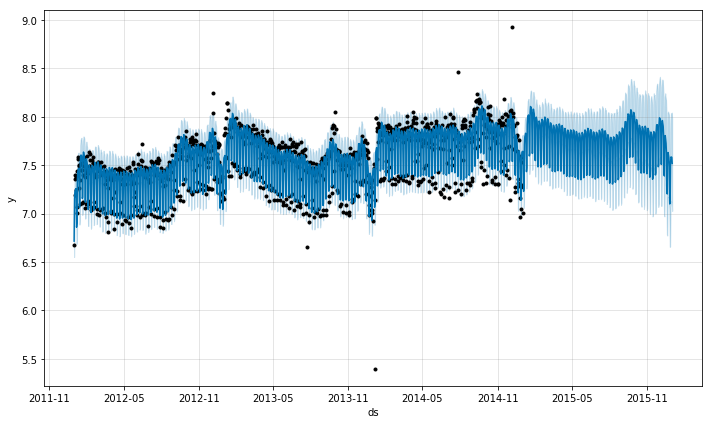

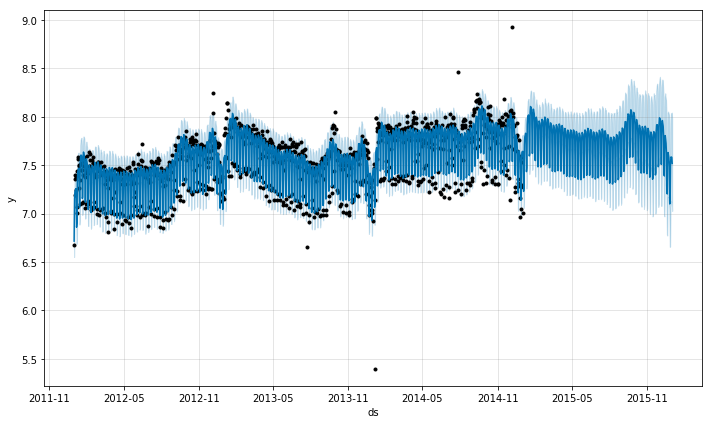

In [48]:
fmodel_ts_no_outs.plot(forecast_ts_no_outs)

In [50]:
fmodel_ts_full = Prophet()
fmodel_ts_full.fit(ts_full)
future_ts_full = fmodel_ts_full.make_future_dataframe(periods=365)

forecast_ts_full = fmodel_ts_full.predict(future_ts_full)

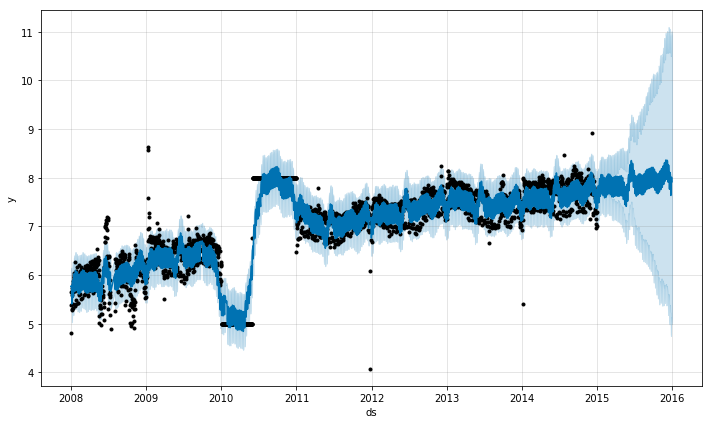

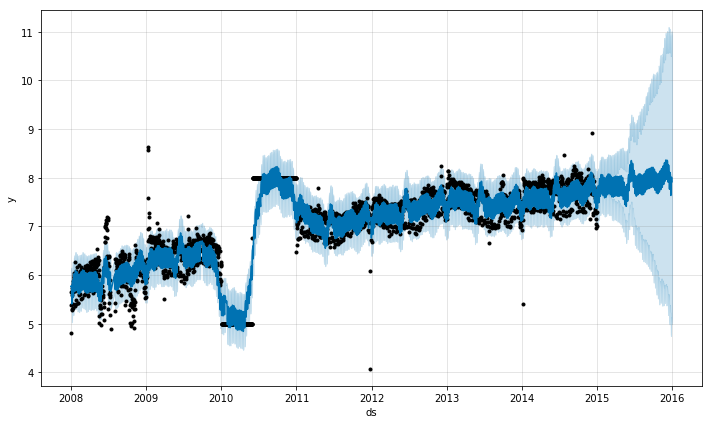

In [52]:
fmodel_ts_full.plot(forecast_ts_full)

Оцените качество прогноза с помощью MSE, MAE и $r^2$-score (т.е. сравните прогноз с реальным поведением временного ряда). Для этого может быть полезна функция `make_comparison_dataframe` (приведенная в [статье](https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-9-part-3-predicting-the-future-with-facebook-prophet-3f3af145cdc)).

In [69]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.
    
       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].merge(historical, left_index=True, right_index=True)


### Your code here

In [79]:
ts_no_outs_c = make_comparison_dataframe(ts_no_outs, forecast_ts_no_outs)

In [80]:
ts_no_outs_c.tail(n=3)

,yhat,yhat_lower,yhat_upper,ds,y
ds,,,,,
2014-12-30,7.636728,7.460847,7.801140,2014-12-30,7.582229
2014-12-31,7.636973,7.474004,7.808543,2014-12-31,7.292337
2015-01-01,7.643269,7.470598,7.814727,2015-01-01,7.003974


In [75]:
ts_full_c = make_comparison_dataframe(ts_full, forecast_ts_full)

In [78]:
ts_full_c.tail(n=3)

,yhat,yhat_lower,yhat_upper,ds,y
ds,,,,,
2014-12-30,7.748746,7.394338,8.101830,2014-12-30,7.582229
2014-12-31,7.756097,7.406876,8.147610,2014-12-31,7.292337
2015-01-01,7.747170,7.374064,8.113522,2015-01-01,7.003974


Также визуально оцените дисперсию прогноза в случае обучения на `ts_no_outs` и на `ts_full`. 

_Ваш ответ здесь_

#### Автоматическая работа с пропущенными значениями (25%)

На самом деле, библиотека Facebook Prophet умеет работать с пропущенными значениями. Создайте копию `ts_copy` ряда `ts_full` и замените в ней значения с 2010-01-01 по 2011-01-01 на `None`.

In [ ]:
ts_copy = ts_full.copy()

### Your code here

Снова постройте прогноз на год вперед, но теперь на основании `ts_copy`.

In [ ]:
### Your code here

Оцените качество прогноза с помощью MSE, MAE и $r^2$-score. Стал ли прогноз лучше? Что стало с дисперсие прогноза?

In [ ]:
### Your code here

_Ваш ответ здесь_

#### Добавление информации о выходных днях.
Добавьте информацию о выходных днях (суббота и воскресенье). Для этого может быть полезен [вот этот ноутбук](https://github.com/facebook/prophet/blob/master/notebooks/seasonality%2C_holiday_effects%2C_and_regressors.ipynb) в качестве примера (`lower_window` и `upper_window` нам неактуальны, т.к. выходные не имеют локального влияния). 

_Обращаем ваше внимание: если не указать даты особых дней в будущем (т.е. внутри горизонта прогнозирования), то они не будут использованы при построении прогноза. Т.е. нужно указывать и даты в будущем_.

In [ ]:
saturdays  = pd.DataFrame({
  'holiday': 'saturday',
  'ds': ts.loc[ts.index.weekday == 5].ds### Your code here
})


sundays  = pd.DataFrame({
  'holiday': 'sunday',
  'ds': ts.loc[ts.index.weekday == 6].ds
})

### Your code here

Постройте прогноз на год вперед c учетом выходных дней на основании `ts_copy` (с которым мы работали до этого).

In [ ]:
### Your code here

Оцените качество прогноза с помощью MSE, MAE и $r^2$-score. Стал ли прогноз лучше? Что стало с дисперсие прогноза?

In [ ]:
### Your code here

#### Опциональные эксперименты (это опциональная часть, делать ее необязательно, бонус до 0.2 баллов).
Временной ряд, с которым мы работаем, описывает количество обращений к фиксированной статье в Википедии. Вы можете попробовать добавить информацию о международных праздниках и некоторых значимых событиях; попробовать применить некоторые другие возможности библиотеки Facebook Prophet. Любые идеи на ваш вкус :)

In [ ]:
### Your optional code here

Пожалуйста, оставьте отзыв о домашнем задании: [link](http://bit.ly/ml4megafon_august18_hw3prophet_feedback)